In [1]:
import networkit as nk

G = nk.graphio.EdgeListReader("\t", 0).read("./MIT8.edgelist")

print(G)

NetworKit.Graph(n=6440, m=251252)


Anzahl der ZHKs:  18


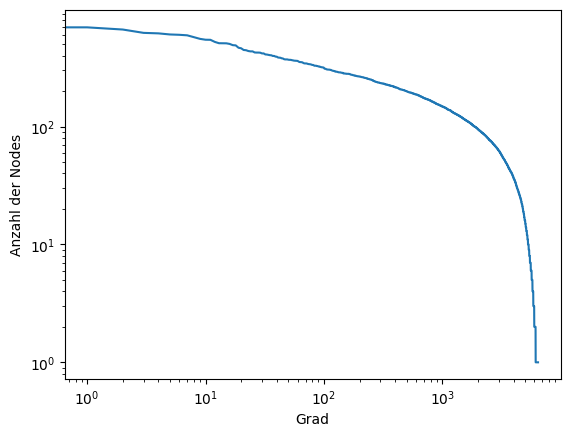

In [2]:
import matplotlib.pyplot as plt

cc = nk.components.ConnectedComponents(G)
cc.run()

print("Anzahl der ZHKs: ", cc.numberOfComponents())

lzhk = cc.extractLargestConnectedComponent(G)

dd = sorted(nk.centrality.DegreeCentrality(G).run().scores(), reverse=True)
plt.xscale("log")
plt.xlabel("Grad")
plt.yscale("log")
plt.ylabel("Anzahl der Nodes")
plt.loglog(dd)
plt.show()

In [3]:
import powerlaw

results = powerlaw.Fit(list(cc.getComponentSizes().values()))
print(results.power_law.alpha)

Calculating best minimal value for power law fit
2.879837460785231


In [12]:
import math
from collections import Counter, defaultdict
from networkit import distance
from itertools import islice
import numpy as np

valuePairs = list(tuple())

medians = defaultdict(int)
maxs = defaultdict(int)

sources = list(islice(lzhk.iterNodes(), None, lzhk.numberOfNodes(), 25))

spsp = distance.SPSP(lzhk, sources)
spsp.run()

npDistances = np.asarray(spsp.getDistances())

for distance in npDistances:
    upDistance = distance[distance < 100000]
    upDistance = upDistance[upDistance > 1]

    medians[int(np.median(upDistance))] += 1
    maxs[int(np.max(upDistance))] += 1

print("maxs: ")
print(maxs)
print("medians: ")
print(medians)

maxs: 
defaultdict(<class 'int'>, {6: 136, 5: 116, 7: 5})
medians: 
defaultdict(<class 'int'>, {3: 154, 2: 100, 4: 3})


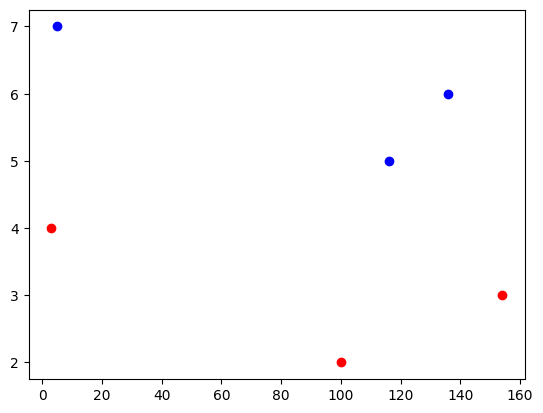

In [14]:
for key in medians.keys():
    plt.scatter(medians[key], key, color="red")

for key in maxs.keys():
    plt.scatter(maxs[key], key, color="blue")
plt.show()